<a href="https://colab.research.google.com/github/jennermaxim/machine_learning/blob/main/Clustering_Income_Spent_Using_Hierarchical_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the basic libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

Load Dataset from Local Directory

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Hierachical_cluster_dataset.csv to Hierachical_cluster_dataset (2).csv


In [ ]:
dataset = pd.read_csv('Hierachical_cluster_dataset.csv')

Summarize Dataset

In [ ]:
print(dataset.shape)
print(dataset.describe())
print(dataset.head(5))

(200, 5)
       CustomerID         Age  Annual Income (k$)  Spending Score
count  200.000000  200.000000          200.000000      200.000000
mean   100.500000   38.850000           60.560000       50.200000
std     57.879185   13.969007           26.264721       25.823522
min      1.000000   18.000000           15.000000        1.000000
25%     50.750000   28.750000           41.500000       34.750000
50%    100.500000   36.000000           61.500000       50.000000
75%    150.250000   49.000000           78.000000       73.000000
max    200.000000   70.000000          137.000000       99.000000
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score
0           1    Male   19                  15              39
1           2    Male   21                  15              81
2           3  Female   20                  16               6
3           4  Female   23                  16              77
4           5  Female   31                  17              40


Label Encoding

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
dataset['Gender'] = label_encoder.fit_transform(dataset['Gender'])
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


<h1>Using the Agglomerative Clustering Algorithm</h1>


<h2>Using Single Linkage</h2>

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

model = fcluster(linkage(dataset, method = 'single', metric = 'euclidean'), t = 5, criterion = 'maxclust')
model

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 1, 2, 3, 2, 4, 2, 4, 2,
       1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       5, 2], dtype=int32)

Visualizing the number of clusters n = 5
<br>
Cluster 1: Customers with Medium Income and Medium Spending
<br>
Cluster 2: Customers with High Income and High Spending
<br>
Cluster 3: Customers with Low Income and Low Spending
<br>
Cluster 4: Customers with High Income and Low Spending
<br>
Cluster 5: Customers with Low Income and High Spending

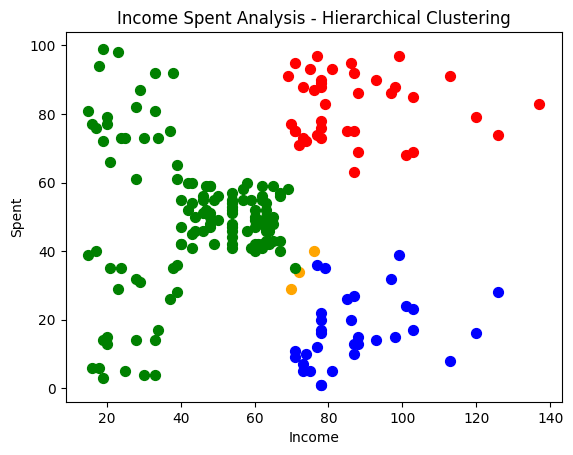

In [ ]:
x = dataset.iloc[:, [3,4]].values
plt.scatter(x[model == 0, 0], x[model == 0, 1], s = 50, c = 'purple', label = 'Cluster 1')
plt.scatter(x[model == 1, 0], x[model == 1, 1], s = 50, c = 'orange', label = 'Cluster 2')
plt.scatter(x[model == 2, 0], x[model == 2, 1], s = 50, c = 'red', label = 'Cluster 3')
plt.scatter(x[model == 3, 0], x[model == 3, 1], s = 50, c = 'green', label = 'Cluster 4')
plt.scatter(x[model == 4, 0], x[model == 4, 1], s = 50, c = 'blue', label = 'Cluster 5')
plt.title('Income Spent Analysis - Hierarchical Clustering')
plt.xlabel('Income')
plt.ylabel('Spent')
plt.show()

Evaluating the model that used Divisive Clustering Algorithm and Single Linkage by calculating the silhouette Score, Calinski-Harabasz Index, and Davies-Bouldin Index

In [ ]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# x = dataset.values
silhouette = silhouette_score(x, model)
calinski_harabasz = calinski_harabasz_score(x, model)
davies_bouldin = davies_bouldin_score(x, model)

print("Silhoutte Score: ", silhouette)
print("Calinski - Harabasz Index: ", calinski_harabasz)
print("Davies - Bouldin Index: ", davies_bouldin)

Silhoutte Score:  0.18919746617782585
Calinski - Harabasz Index:  79.30721596538682
Davies - Bouldin Index:  0.7009144148859556


<h2>Using Complete Linkage</h2>

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

model = fcluster(linkage(dataset, method = 'complete', metric = 'euclidean'), t = 5, criterion = 'maxclust')
model

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 4, 3, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 4, 4, 5, 4, 4, 4, 4, 4, 5, 4, 4, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 5, 2, 5, 2, 2, 2, 2, 2,
       5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

Visualizing the number of clusters n = 5
<br>
Cluster 1: Customers with Medium Income and Medium Spending
<br>
Cluster 2: Customers with High Income and High Spending
<br>
Cluster 3: Customers with Low Income and Low Spending
<br>
Cluster 4: Customers with High Income and Low Spending
<br>
Cluster 5: Customers with Low Income and High Spending

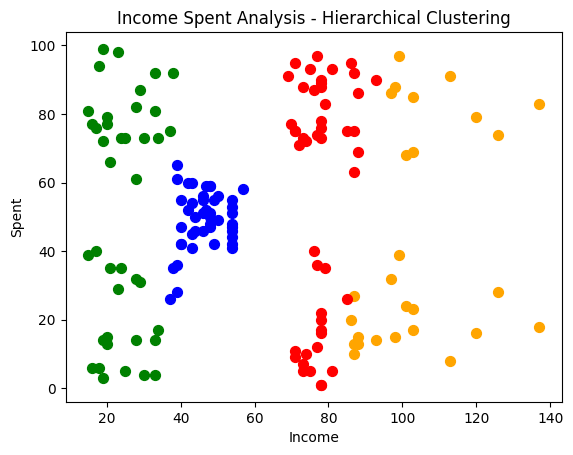

In [ ]:
x = dataset.iloc[:, [3,4]].values
plt.scatter(x[model == 0, 0], x[model == 0, 1], s = 50, c = 'purple', label = 'Cluster 1')
plt.scatter(x[model == 1, 0], x[model == 1, 1], s = 50, c = 'orange', label = 'Cluster 2')
plt.scatter(x[model == 2, 0], x[model == 2, 1], s = 50, c = 'red', label = 'Cluster 3')
plt.scatter(x[model == 3, 0], x[model == 3, 1], s = 50, c = 'green', label = 'Cluster 4')
plt.scatter(x[model == 4, 0], x[model == 4, 1], s = 50, c = 'blue', label = 'Cluster 5')
plt.title('Income Spent Analysis - Hierarchical Clustering')
plt.xlabel('Income')
plt.ylabel('Spent')
plt.show()

Evaluating the model that used Divisive Clustering Algorithm and Single Linkage by calculating the silhouette Score, Calinski-Harabasz Index, and Davies-Bouldin Index

In [ ]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# x = dataset.values

silhouette = silhouette_score(x, model)
calinski_harabasz = calinski_harabasz_score(x, model)
davies_bouldin = davies_bouldin_score(x, model)

print("Silhoutte Score: ", silhouette)
print("Calinski - Harabasz Index: ", calinski_harabasz)
print("Davies - Bouldin Index: ", davies_bouldin)

Silhoutte Score:  0.16188971808204244
Calinski - Harabasz Index:  45.19717387451248
Davies - Bouldin Index:  2.0612015966590023


<h2>Using Average Linkage</h2>

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

model = fcluster(linkage(dataset, method = 'average', metric = 'euclidean'), t = 5, criterion = 'maxclust')
model

array([5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4,
       5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 3,
       5, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 2, 1, 3, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

Visualizing the number of clusters n = 5
<br>
Cluster 1: Customers with Medium Income and Medium Spending
<br>
Cluster 2: Customers with High Income and High Spending
<br>
Cluster 3: Customers with Low Income and Low Spending
<br>
Cluster 4: Customers with High Income and Low Spending
<br>
Cluster 5: Customers with Low Income and High Spending

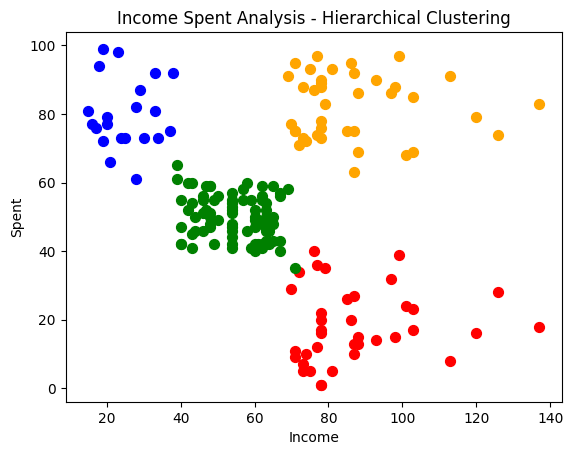

In [ ]:
x = dataset.iloc[:, [3,4]].values
plt.scatter(x[model == 0, 0], x[model == 0, 1], s = 50, c = 'purple', label = 'Cluster 1')
plt.scatter(x[model == 1, 0], x[model == 1, 1], s = 50, c = 'orange', label = 'Cluster 2')
plt.scatter(x[model == 2, 0], x[model == 2, 1], s = 50, c = 'red', label = 'Cluster 3')
plt.scatter(x[model == 3, 0], x[model == 3, 1], s = 50, c = 'green', label = 'Cluster 4')
plt.scatter(x[model == 4, 0], x[model == 4, 1], s = 50, c = 'blue', label = 'Cluster 5')
plt.title('Income Spent Analysis - Hierarchical Clustering')
plt.xlabel('Income')
plt.ylabel('Spent')
plt.show()

Evaluating the model that used Divisive Clustering Algorithm and Single Linkage by calculating the silhouette Score, Calinski-Harabasz Index, and Davies-Bouldin Index:

In [ ]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# x = dataset.values
silhouette = silhouette_score(x, model)
calinski_harabasz = calinski_harabasz_score(x, model)
davies_bouldin = davies_bouldin_score(x, model)

print("Silhoutte Score: ", silhouette)
print("Calinski - Harabasz Index: ", calinski_harabasz)
print("Davies - Bouldin Index: ", davies_bouldin)

Silhoutte Score:  0.5530109473250928
Calinski - Harabasz Index:  246.26709254799312
Davies - Bouldin Index:  0.5697743480051443


<h1>Using the Agglomerative Clustering Algorithm</h1>


Dendrogram Data visualization

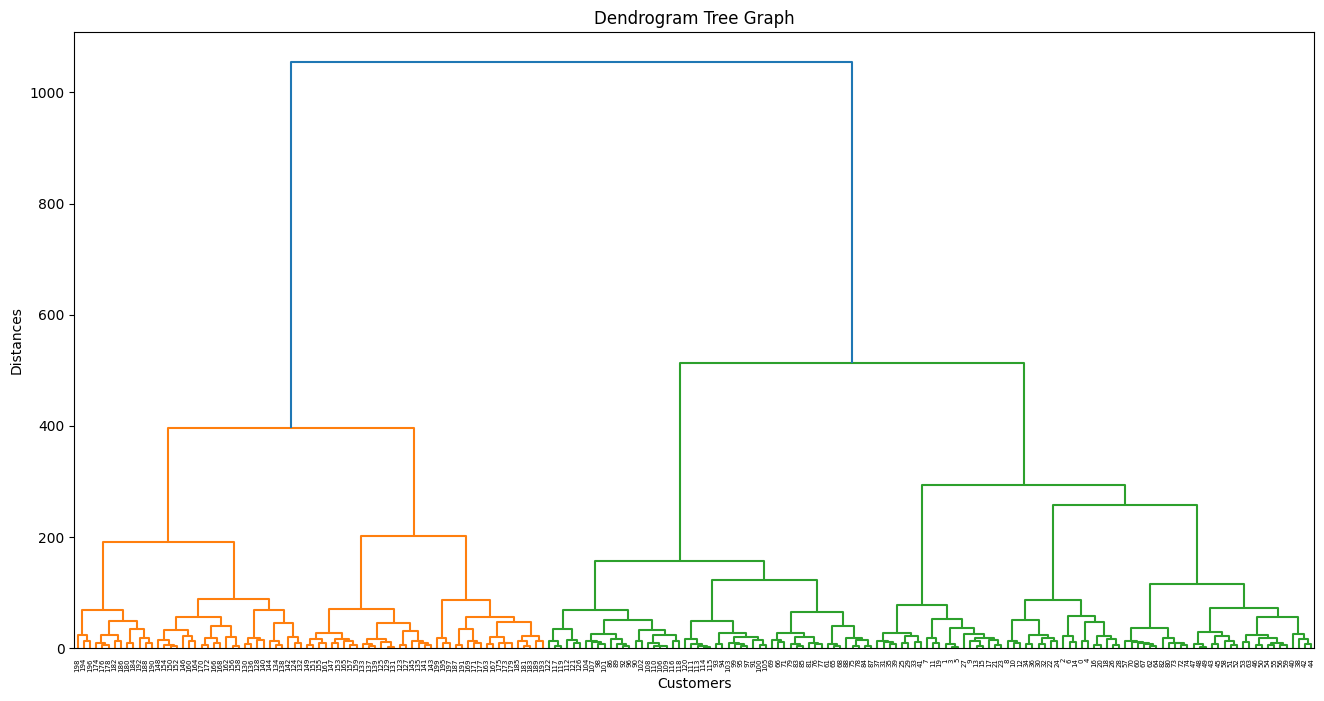

In [ ]:
import scipy.cluster.hierarchy as clus
plt.figure(1, figsize = (16, 8))
dendrogram = clus.dendrogram(clus.linkage(dataset, method = "ward"))

plt.title('Dendrogram Tree Graph')
plt.xlabel('Customers')
plt.ylabel('Distances')
plt.show()

Fitting the Hierachial clustering to the dataset with n = 5

<h2>Using Single Linkage</h2>

In [ ]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'single')
y_means = model.fit_predict(dataset)
y_means

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 4, 2, 1, 2, 0, 2, 0, 2,
       4, 2, 0, 2, 0, 2, 0, 2, 0, 2, 4, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       3, 2])

Visualizing the number of clusters n = 5
<br>
Cluster 1: Customers with Medium Income and Medium Spending
<br>
Cluster 2: Customers with High Income and High Spending
<br>
Cluster 3: Customers with Low Income and Low Spending
<br>
Cluster 4: Customers with High Income and Low Spending
<br>
Cluster 5: Customers with Low Income and High Spending

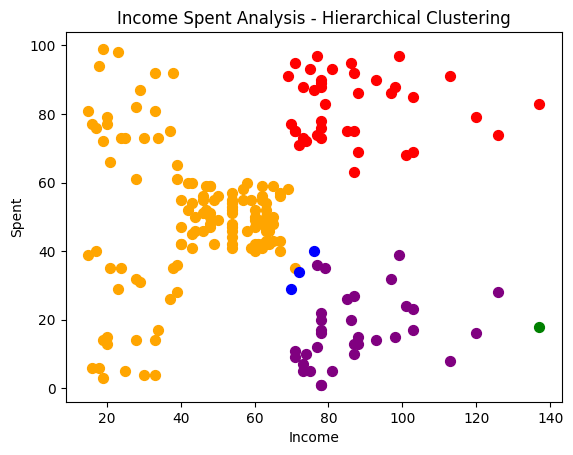

In [ ]:
x = dataset.iloc[:, [3,4]].values
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 50, c = 'purple', label = 'Cluster 1')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 50, c = 'orange', label = 'Cluster 2')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 50, c = 'red', label = 'Cluster 3')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 50, c = 'green', label = 'Cluster 4')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 50, c = 'blue', label = 'Cluster 5')
plt.title('Income Spent Analysis - Hierarchical Clustering')
plt.xlabel('Income')
plt.ylabel('Spent')
plt.show()

Evaluating the model that used Divisive Clustering Algorithm and Single Linkage by calculating the silhouette Score, Calinski-Harabasz Index, and Davies-Bouldin Index:

In [ ]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# x = dataset.values
silhouette = silhouette_score(x, y_means)
calinski_harabasz = calinski_harabasz_score(x, y_means)
davies_bouldin = davies_bouldin_score(x, y_means)

print("Silhoutte Score: ", silhouette)
print("Calinski - Harabasz Index: ", calinski_harabasz)
print("Davies - Bouldin Index: ", davies_bouldin)

Silhoutte Score:  0.18919746617782585
Calinski - Harabasz Index:  79.3072159653868
Davies - Bouldin Index:  0.7009144148859556


<h2>Using Complete Linkage</h2>

In [ ]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'complete')
y_means = model.fit_predict(dataset)
y_means

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 4, 0, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 2, 4, 4, 4, 4, 4, 2, 4, 4, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3])

Visualizing the number of clusters n = 5
<br>
Cluster 1: Customers with Medium Income and Medium Spending
<br>
Cluster 2: Customers with High Income and High Spending
<br>
Cluster 3: Customers with Low Income and Low Spending
<br>
Cluster 4: Customers with High Income and Low Spending
<br>
Cluster 5: Customers with Low Income and High Spending

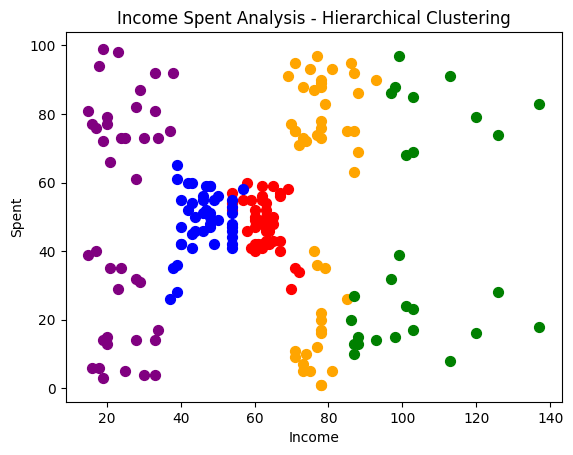

In [ ]:
x = dataset.iloc[:, [3,4]].values
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 50, c = 'purple', label = 'Cluster 1')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 50, c = 'orange', label = 'Cluster 2')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 50, c = 'red', label = 'Cluster 3')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 50, c = 'green', label = 'Cluster 4')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 50, c = 'blue', label = 'Cluster 5')
plt.title('Income Spent Analysis - Hierarchical Clustering')
plt.xlabel('Income')
plt.ylabel('Spent')
plt.show()

Evaluating the model that used Divisive Clustering Algorithm and Single Linkage by calculating the silhouette Score, Calinski-Harabasz Index, and Davies-Bouldin Index:

In [ ]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# x = dataset.values
silhouette = silhouette_score(x, y_means)
calinski_harabasz = calinski_harabasz_score(x, y_means)
davies_bouldin = davies_bouldin_score(x, y_means)

print("Silhoutte Score: ", silhouette)
print("Calinski - Harabasz Index: ", calinski_harabasz)
print("Davies - Bouldin Index: ", davies_bouldin)

Silhoutte Score:  0.16188971808204244
Calinski - Harabasz Index:  45.19717387451248
Davies - Bouldin Index:  2.0612015966590023


<h2>Using Average Linkage</h2>

In [ ]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'average')
y_means = model.fit_predict(dataset)
y_means

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 2,
       3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1])

Visualizing the number of clusters n = 5
<br>
Cluster 1: Customers with Medium Income and Medium Spending
<br>
Cluster 2: Customers with High Income and High Spending
<br>
Cluster 3: Customers with Low Income and Low Spending
<br>
Cluster 4: Customers with High Income and Low Spending
<br>
Cluster 5: Customers with Low Income and High Spending

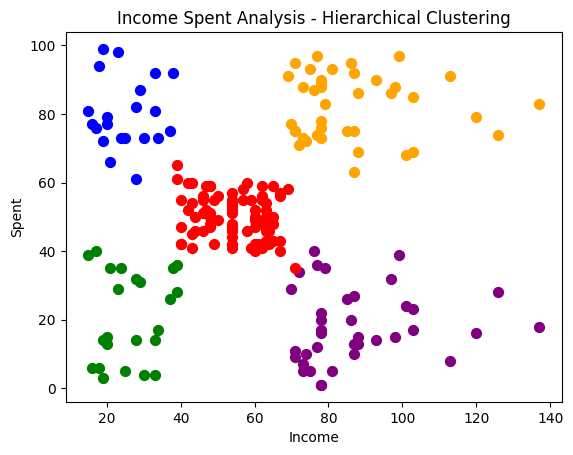

In [ ]:
x = dataset.iloc[:, [3,4]].values
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 50, c = 'purple', label = 'Cluster 1')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 50, c = 'orange', label = 'Cluster 2')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 50, c = 'red', label = 'Cluster 3')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 50, c = 'green', label = 'Cluster 4')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 50, c = 'blue', label = 'Cluster 5')
plt.title('Income Spent Analysis - Hierarchical Clustering')
plt.xlabel('Income')
plt.ylabel('Spent')
plt.show()

Evaluating the model that used Divisive Clustering Algorithm and Single Linkage by calculating the silhouette Score, Calinski-Harabasz Index, and Davies-Bouldin Index:

In [ ]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# x = dataset.values
silhouette = silhouette_score(x, y_means)
calinski_harabasz = calinski_harabasz_score(x, y_means)
davies_bouldin = davies_bouldin_score(x, y_means)

print("Silhoutte Score: ", silhouette)
print("Calinski - Harabasz Index: ", calinski_harabasz)
print("Davies - Bouldin Index: ", davies_bouldin)

Silhoutte Score:  0.5530109473250928
Calinski - Harabasz Index:  246.26709254799312
Davies - Bouldin Index:  0.5697743480051443
